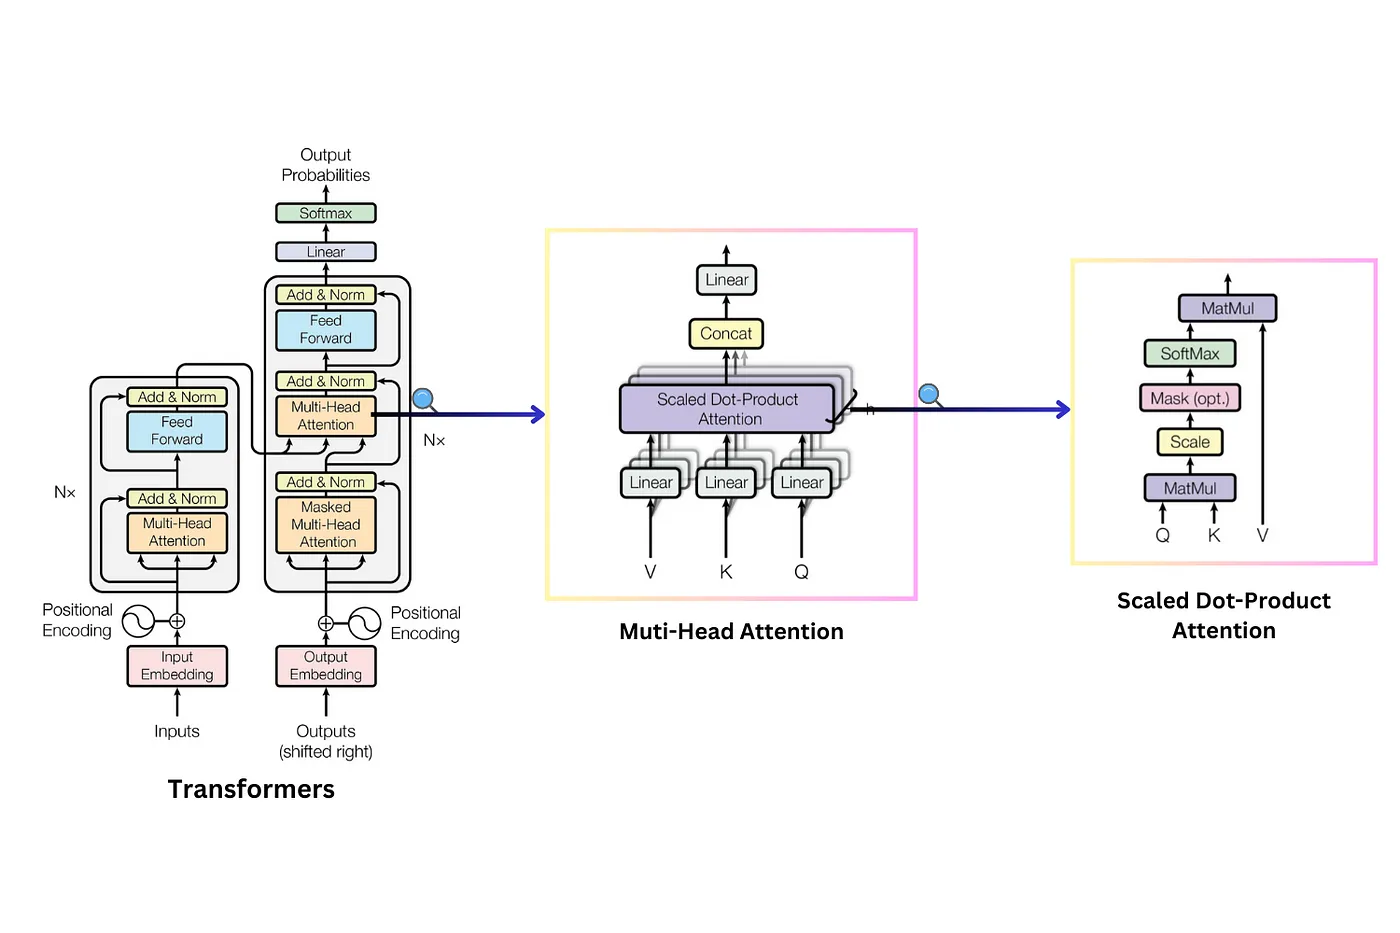

# Self-Attention - (Scaled Dot-Product Attention)

    Calculate the Similarity Between Words using the Dot Product

    Self-attention, is a mechanism that allows a model to weigh the importance of different words or elements in a sequence when making predictions. 


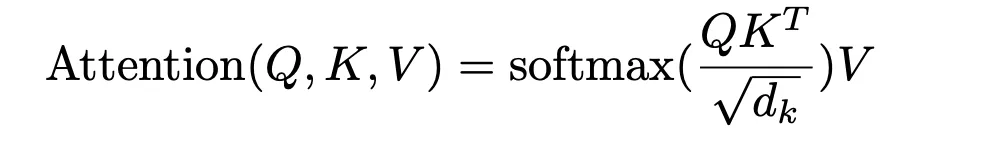 
### elements:
    - Query (Q): Used to calculate attention scores.
    - Key   (K): Represents the elements to be compared against.
    - Value (V): The actual content to be aggregated based on attention scores.

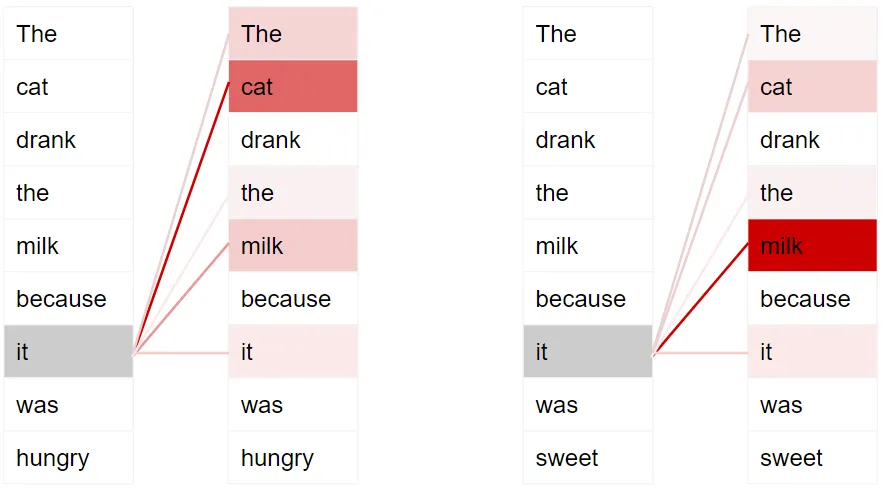

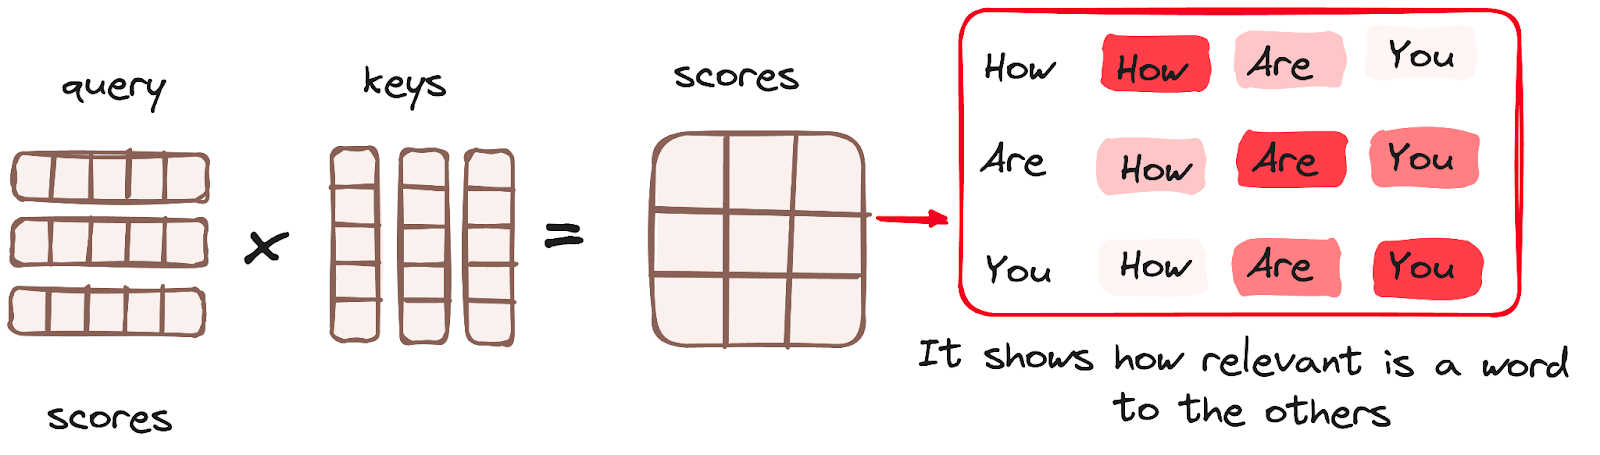

>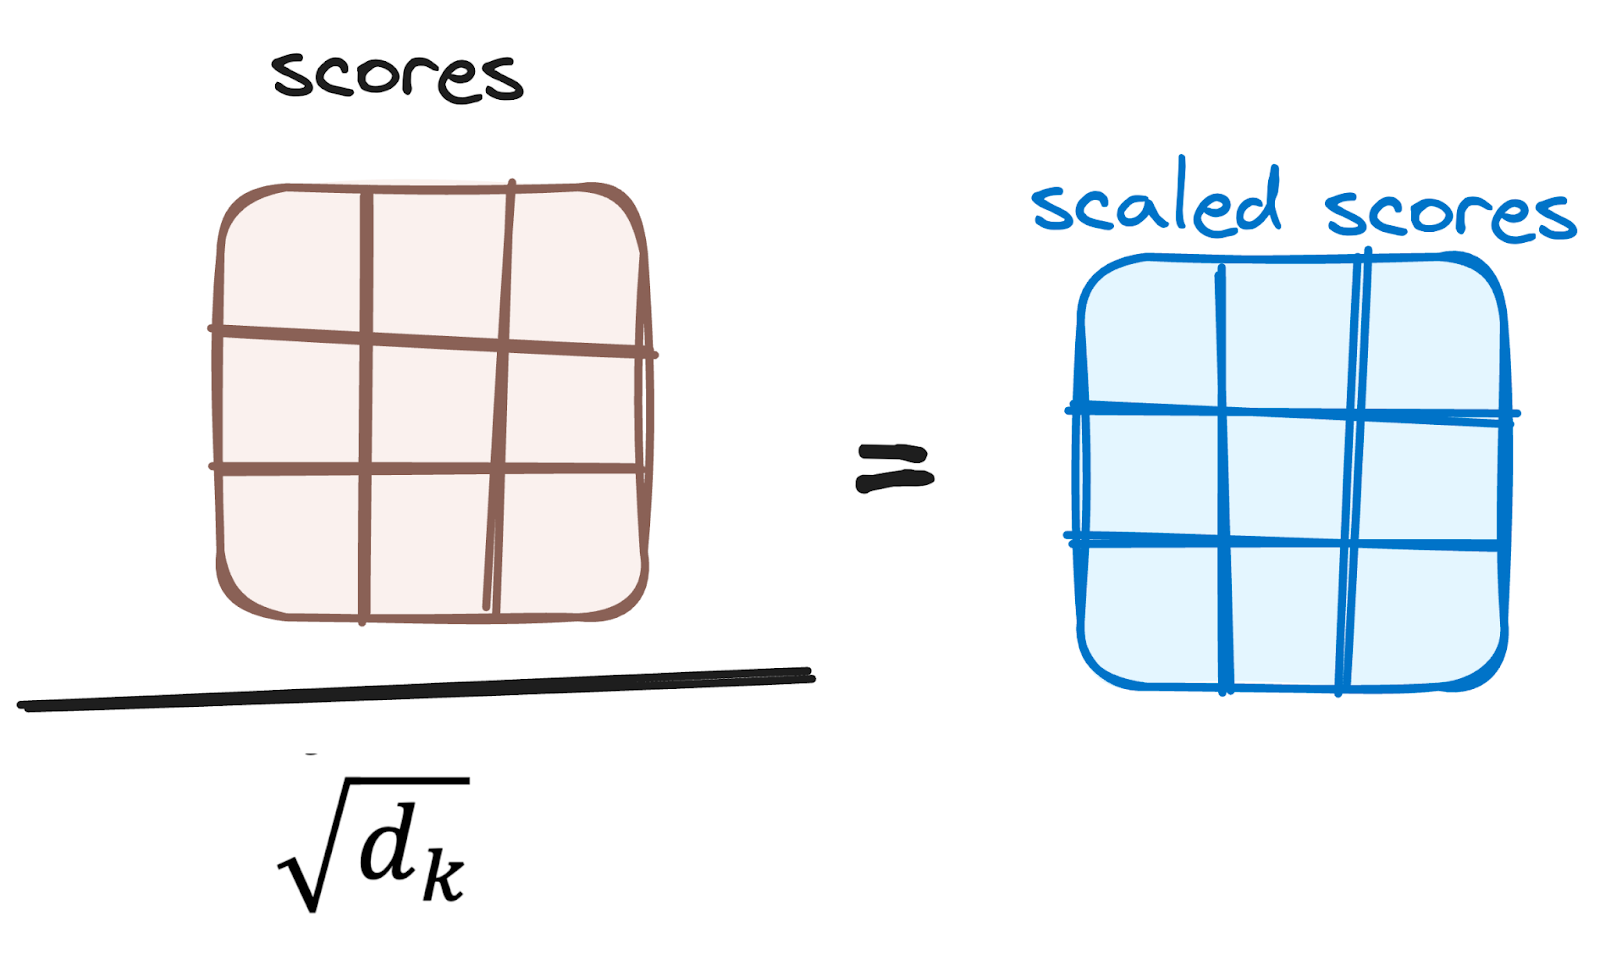 

>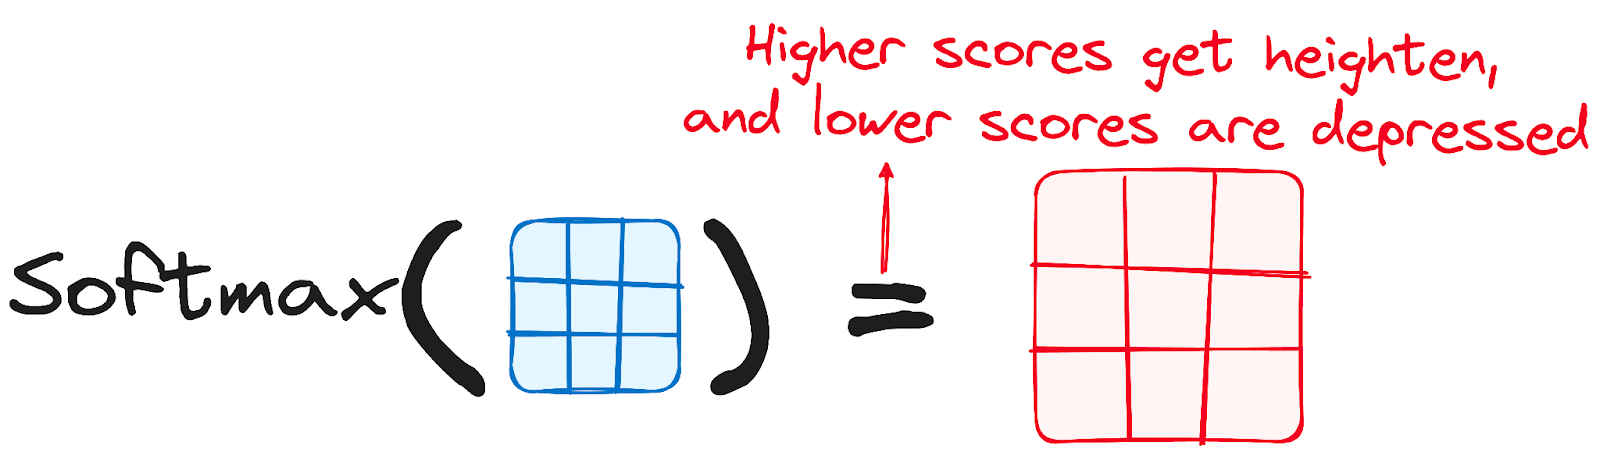

>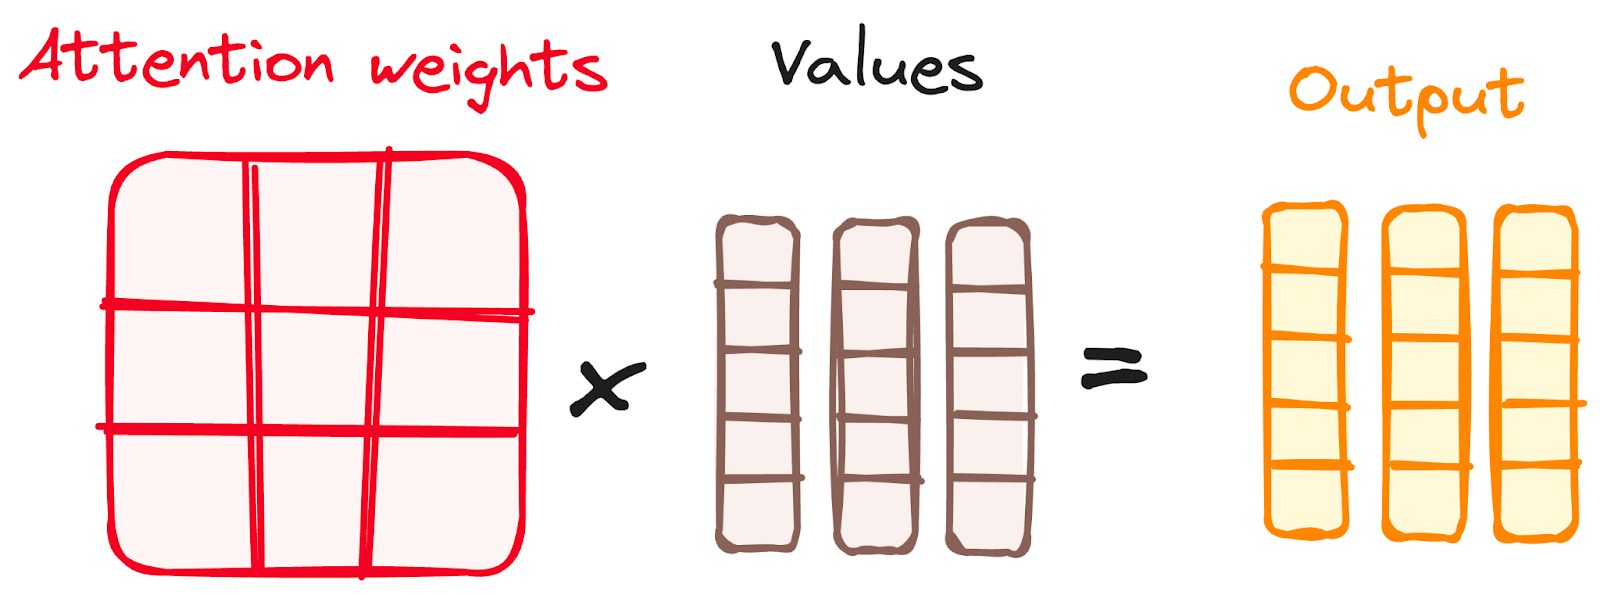 

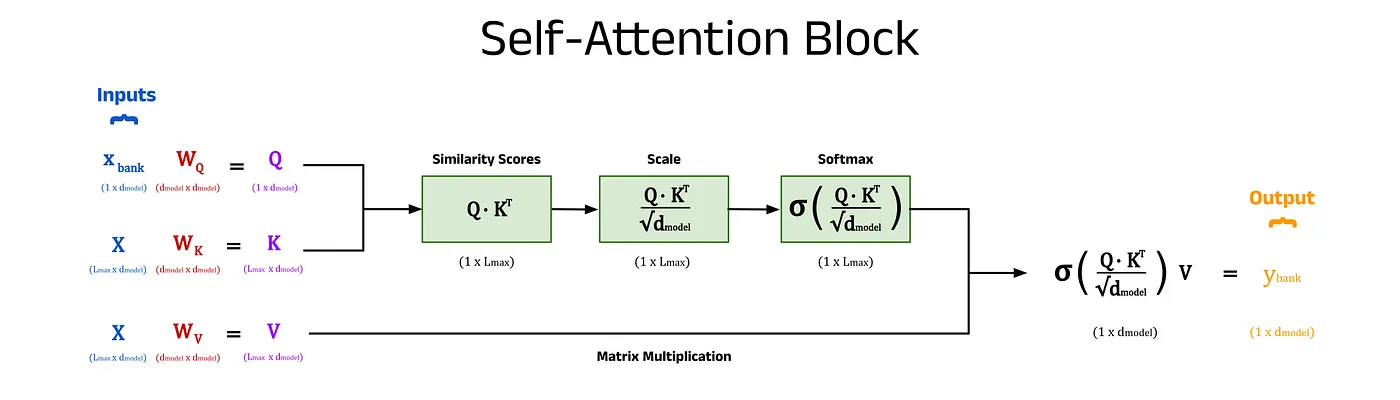

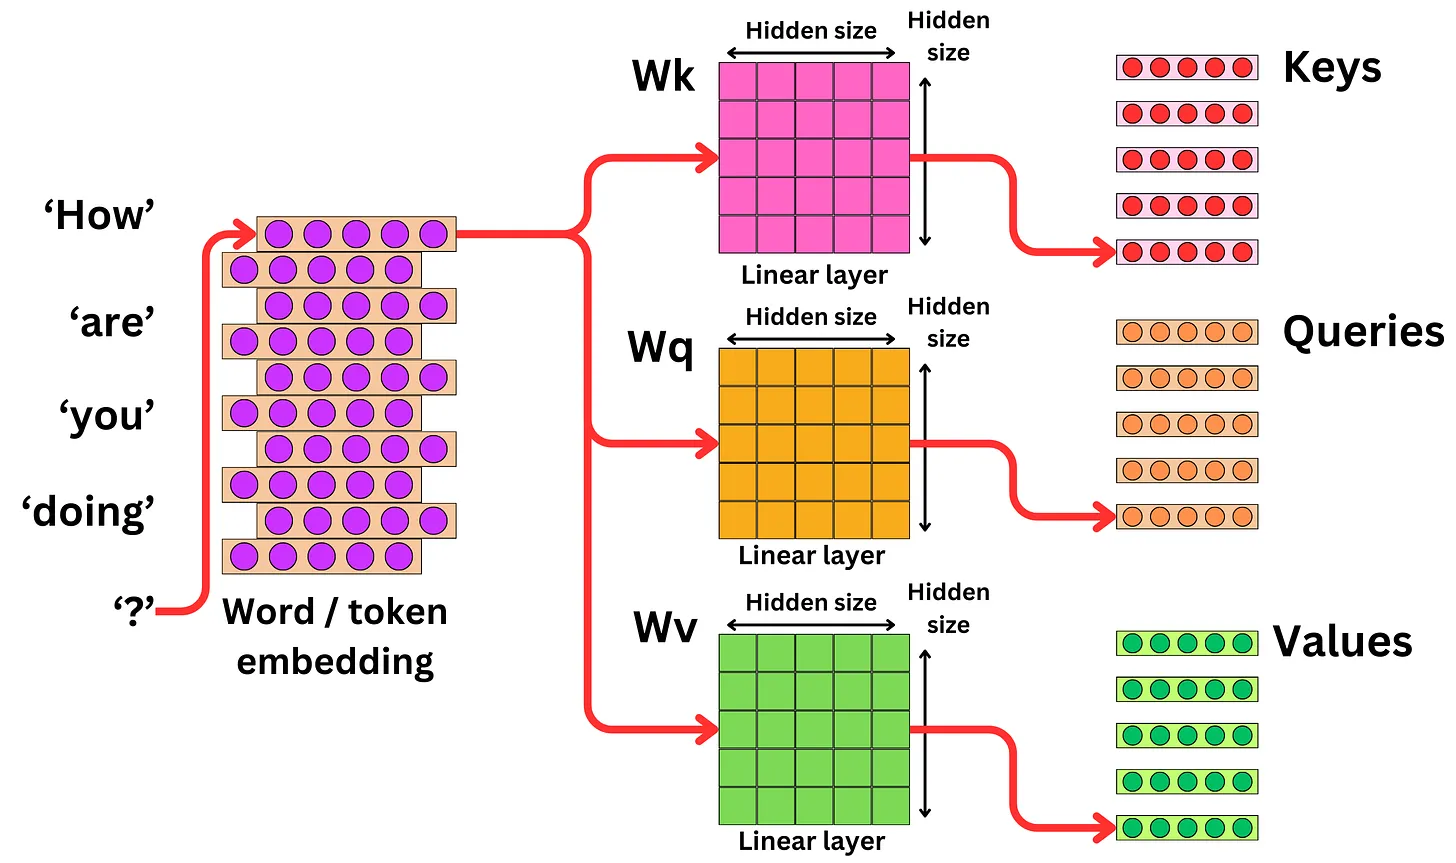

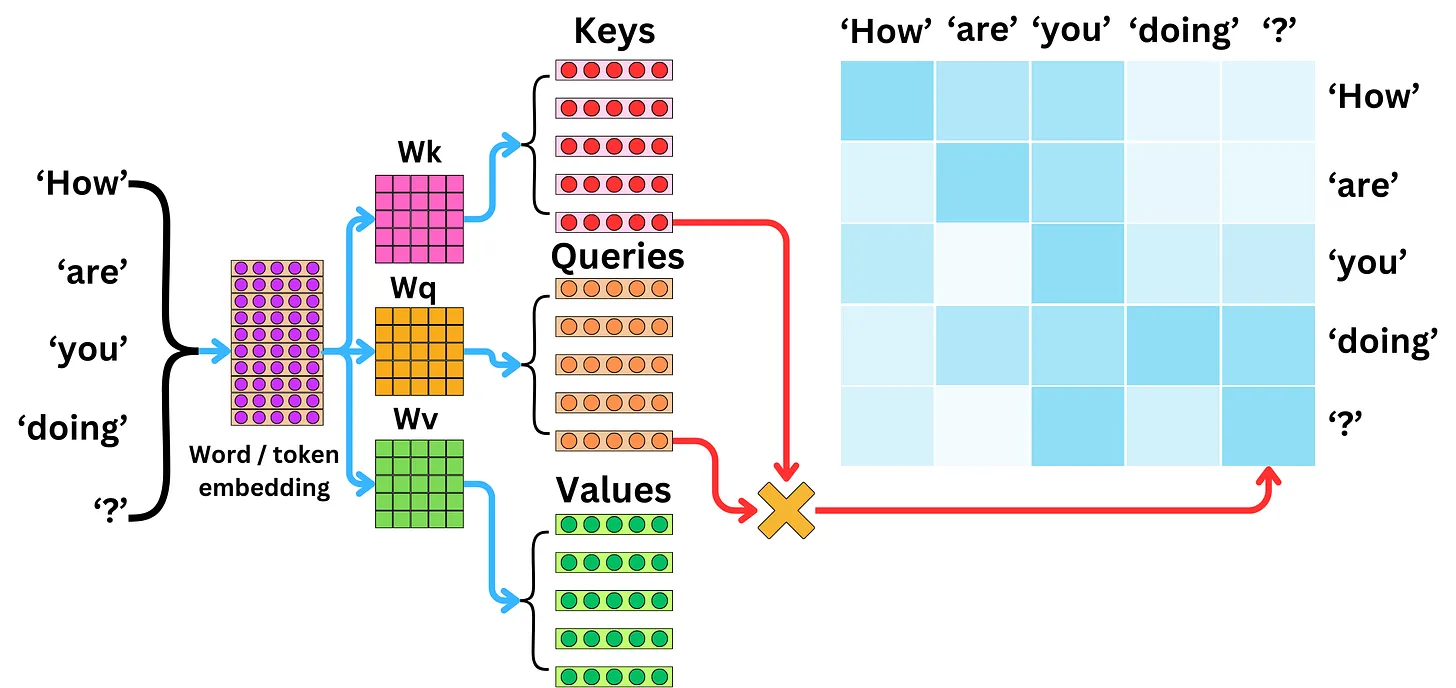

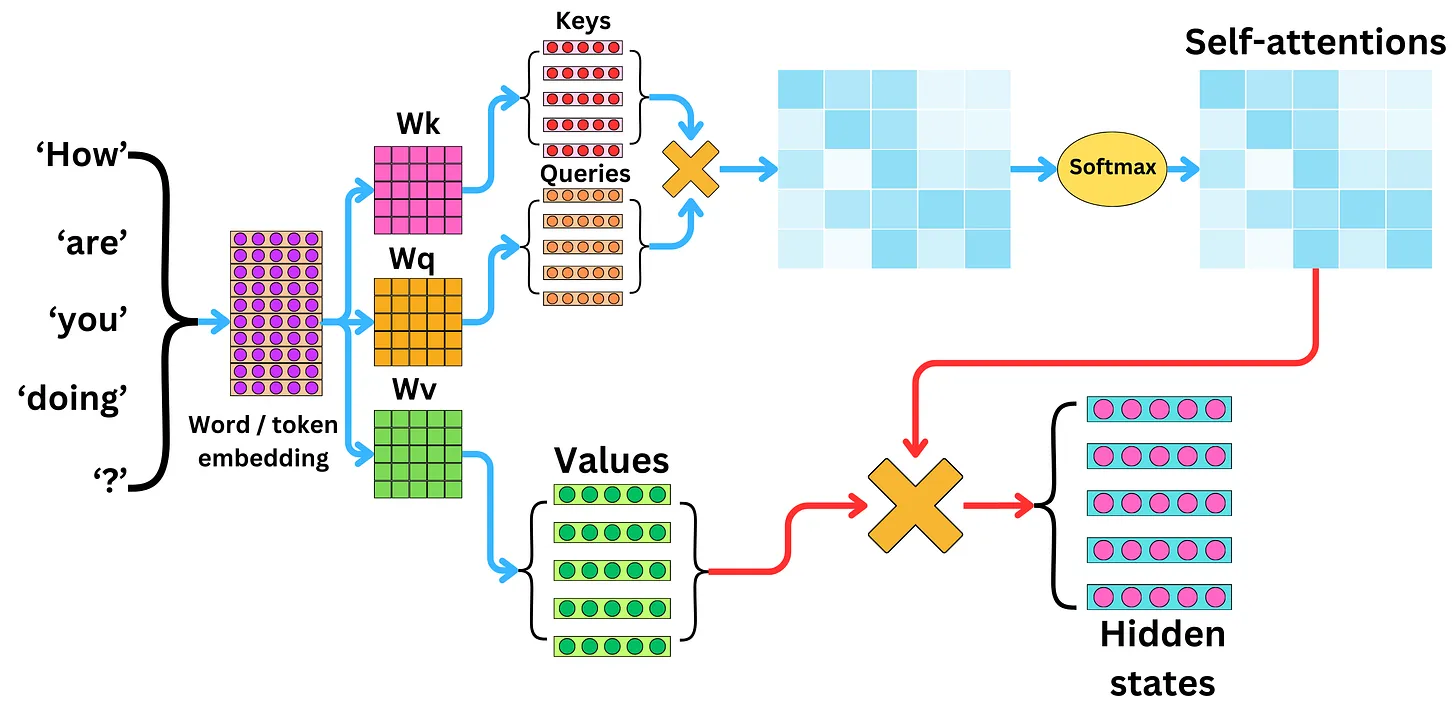

>>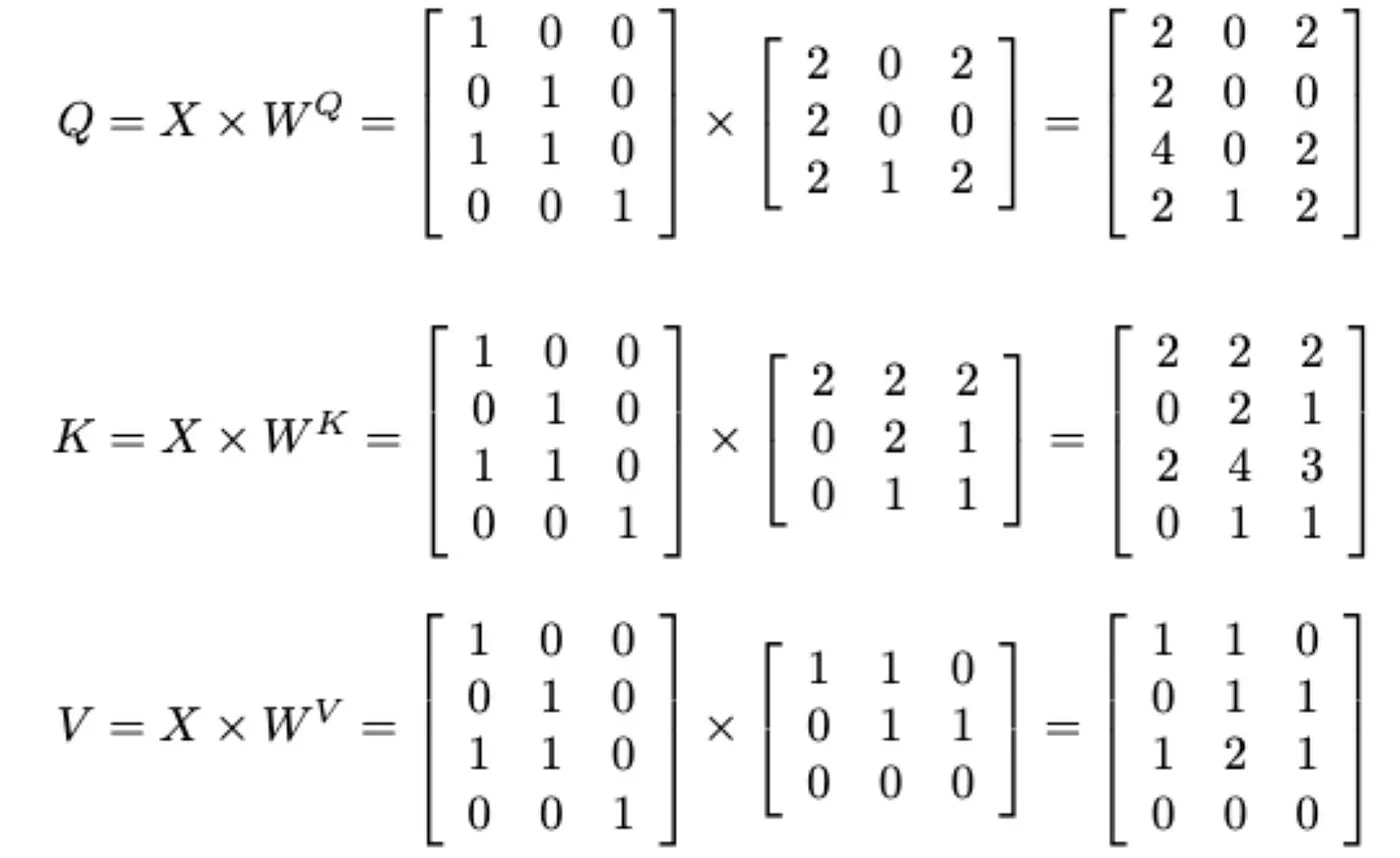 

>>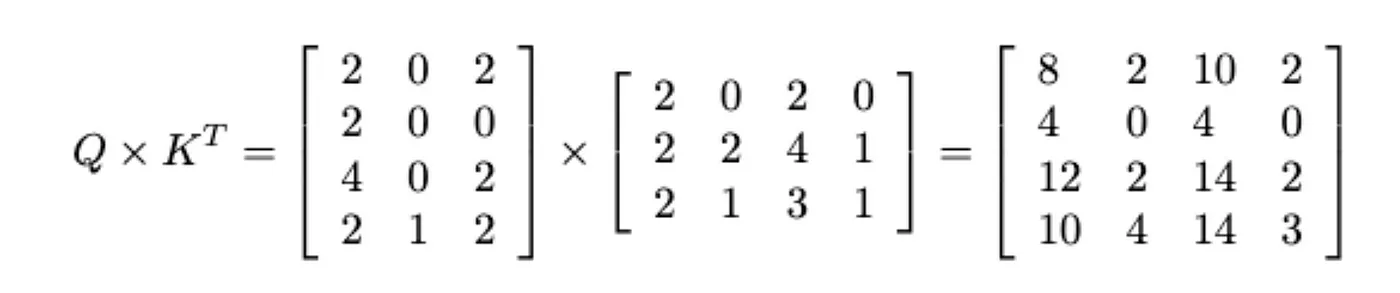

>>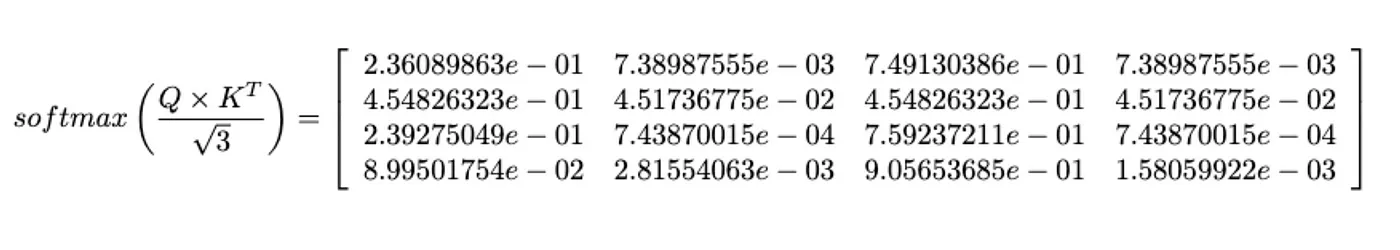

>>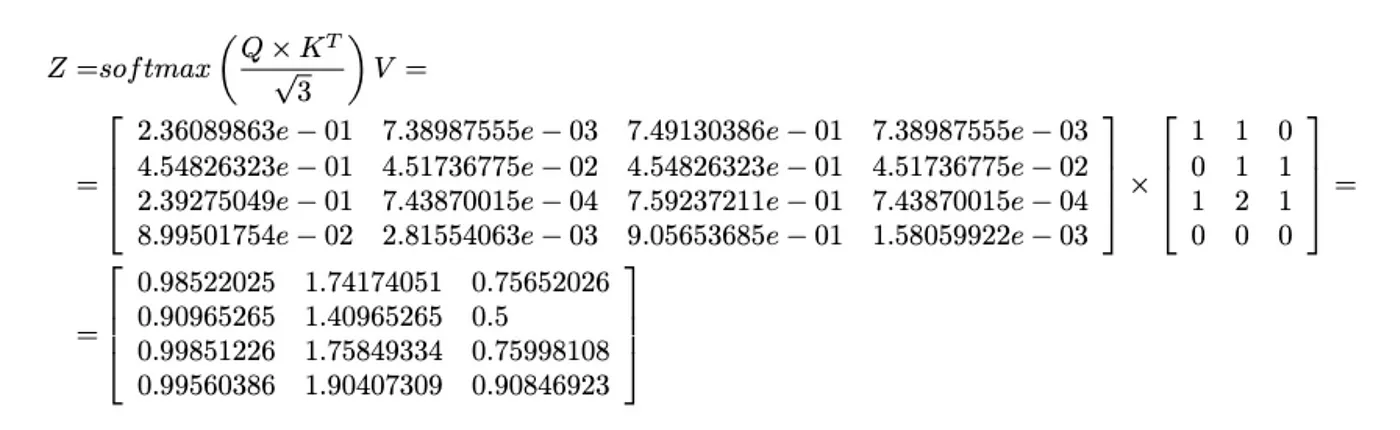

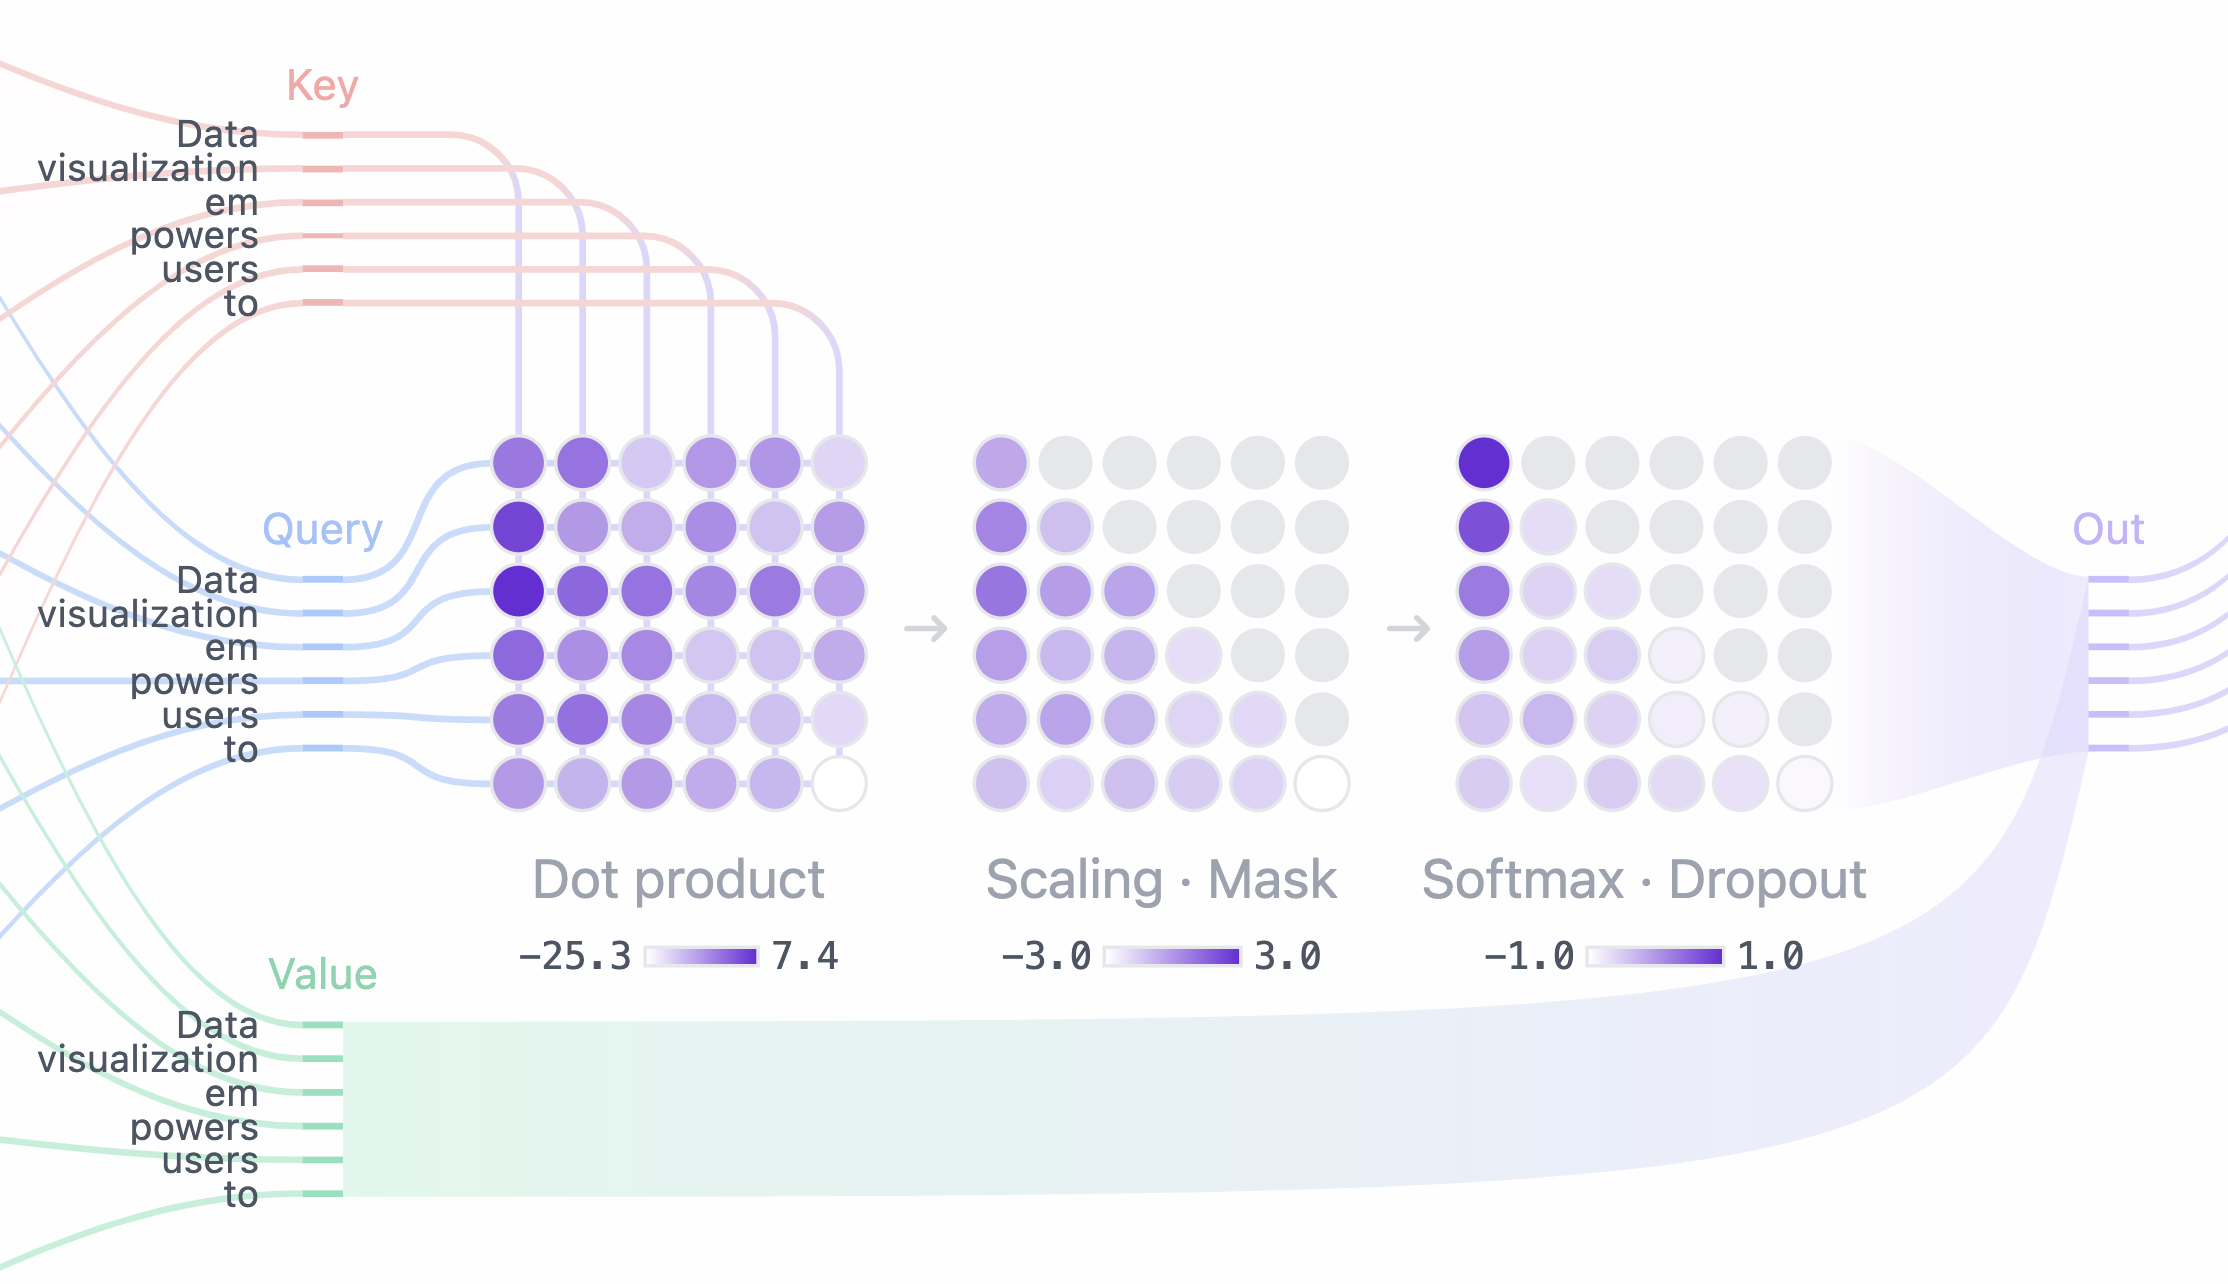

In [20]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer
tokenizer   = AutoTokenizer.from_pretrained("bert-base-uncased") # WordPiece 
embedding_dim = 6

/Users/mani/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
text = "self-Attention Calculates the Similarity Between Words using the Dot Product"

In [22]:
tokenizer.all_special_ids

[100, 102, 0, 101, 103]

In [23]:
tokens = tokenizer.tokenize(text)
print('Token: ',tokens)

inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs['input_ids'] # Token IDs
print('\nIDs: ',input_ids)
print("Token Count: ", input_ids.shape[1])

# Get embeddings for the sentence

embedding = nn.Embedding(tokenizer.vocab_size, embedding_dim)
print(embedding)
word_embeddings = embedding(input_ids)
print("Word Embeddings Shape:", word_embeddings.shape )
print("Word Embeddings:\n", word_embeddings.detach())

Token:  ['self', '-', 'attention', 'calculate', '##s', 'the', 'similarity', 'between', 'words', 'using', 'the', 'dot', 'product']

IDs:  tensor([[  101,  2969,  1011,  3086, 18422,  2015,  1996, 14402,  2090,  2616,
          2478,  1996, 11089,  4031,   102]])
Token Count:  15
Embedding(30522, 6)
Word Embeddings Shape: torch.Size([1, 15, 6])
Word Embeddings:
 tensor([[[-7.9260e-01,  6.3784e-02, -3.0318e-01,  8.5754e-01,  1.2748e+00,
          -9.1798e-01],
         [ 8.1182e-01, -2.2134e-01,  1.2152e+00,  1.1677e+00, -6.8434e-01,
           1.4114e+00],
         [-2.2686e-01, -7.5626e-01,  4.6324e-01, -2.6515e-01, -1.1548e+00,
           6.4623e-01],
         [-1.5043e+00, -7.0743e-01, -4.3163e-01, -4.0776e-01,  2.7811e-01,
          -5.6079e-01],
         [-1.5338e+00,  1.9055e-01, -1.7181e+00, -1.5602e+00,  1.0349e+00,
          -7.3986e-02],
         [-2.2961e+00,  1.1546e+00,  6.2058e-01,  5.2317e-01, -7.9985e-02,
          -1.2188e+00],
         [ 1.5321e+00, -1.9819e-01, -1.4492

Attention Weights:
 tensor([[0.2086, 0.0171, 0.0164, 0.0874, 0.0875, 0.1532, 0.0466, 0.0571, 0.0177,
         0.0173, 0.1546, 0.0466, 0.0338, 0.0261, 0.0300],
        [0.0112, 0.3176, 0.0603, 0.0079, 0.0023, 0.0102, 0.0193, 0.0244, 0.0842,
         0.0813, 0.0290, 0.0193, 0.2175, 0.1022, 0.0134],
        [0.0191, 0.1081, 0.1450, 0.0510, 0.0274, 0.0339, 0.0230, 0.0623, 0.0654,
         0.1663, 0.0164, 0.0230, 0.0929, 0.1124, 0.0537],
        [0.0909, 0.0126, 0.0455, 0.1828, 0.2128, 0.1379, 0.0248, 0.0690, 0.0158,
         0.0458, 0.0269, 0.0248, 0.0249, 0.0308, 0.0547],
        [0.0383, 0.0016, 0.0103, 0.0897, 0.6826, 0.0394, 0.0287, 0.0149, 0.0065,
         0.0063, 0.0065, 0.0287, 0.0023, 0.0035, 0.0406],
        [0.0580, 0.0059, 0.0110, 0.0502, 0.0341, 0.5672, 0.0021, 0.0736, 0.0111,
         0.0586, 0.0123, 0.0021, 0.0077, 0.0086, 0.0975],
        [0.0365, 0.0232, 0.0154, 0.0187, 0.0512, 0.0043, 0.3048, 0.0117, 0.0261,
         0.0035, 0.1435, 0.3048, 0.0185, 0.0288, 0.0090],
       

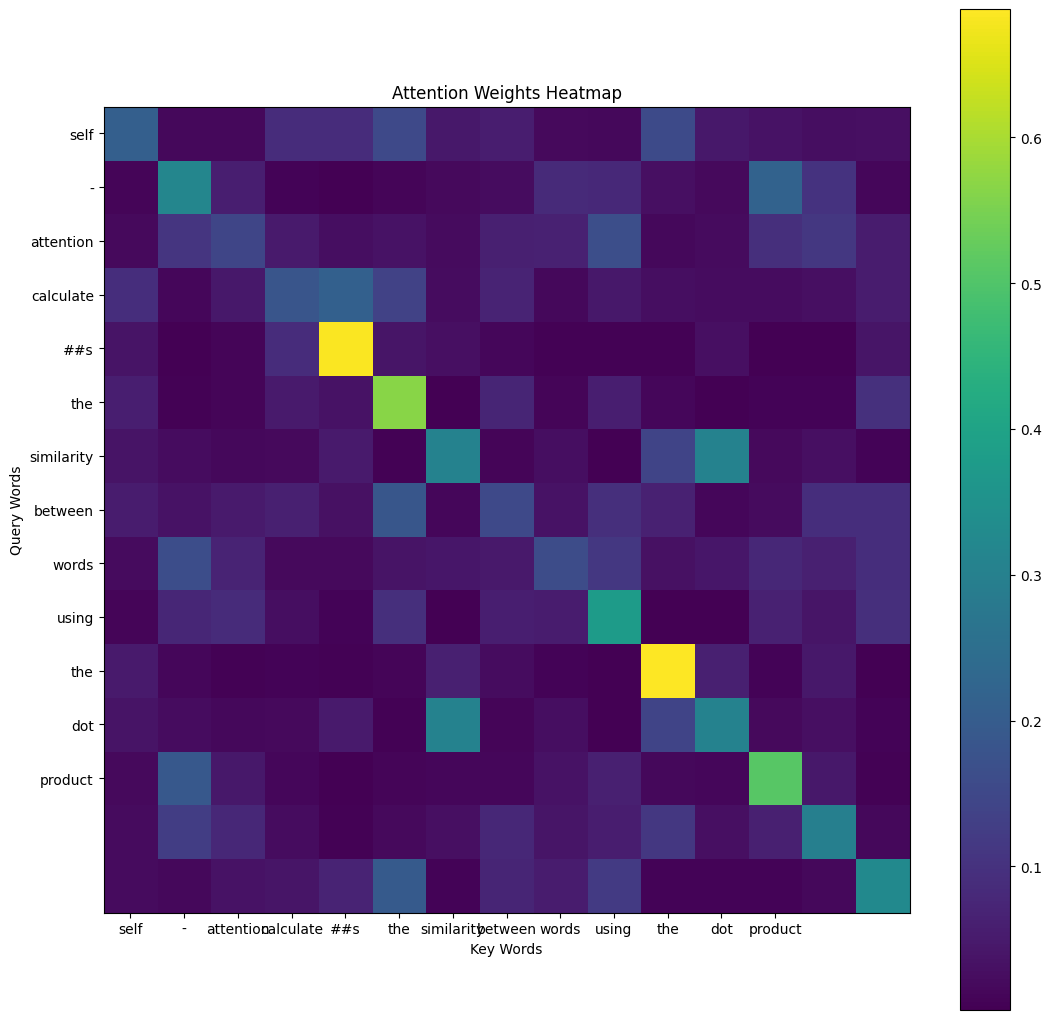

In [24]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
 
 
# Step 1: Create Q, K, and V
Q = word_embeddings.squeeze()  # Queries
K = word_embeddings.squeeze()   # Keys
V = word_embeddings.squeeze()   # Values

# Step 2: Compute the attention scores
attention_scores = torch.matmul(Q, K.T)  # Dot product of Q and K

# Step 3: Scale the scores (optional, for stability)
d_k = K.size(1)  # Dimensionality of the key vectors
scaled_scores = attention_scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

# Step 4: Apply softmax to get attention weights
attention_weights = F.softmax(scaled_scores, dim=-1)

# Step 5: Compute the output as a weighted sum of the values
output = torch.matmul(attention_weights, V)

# Print Attention Weights and Output
print("Attention Weights:\n", attention_weights)
# print("Output:\n", output)

# Step 6: Visualization
plt.figure(figsize=(len(tokens), len(tokens)))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Words")
plt.ylabel("Query Words")
plt.xticks(ticks=range(len(tokens)), labels=tokens)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.show()


## A single-head self-attention mechanism

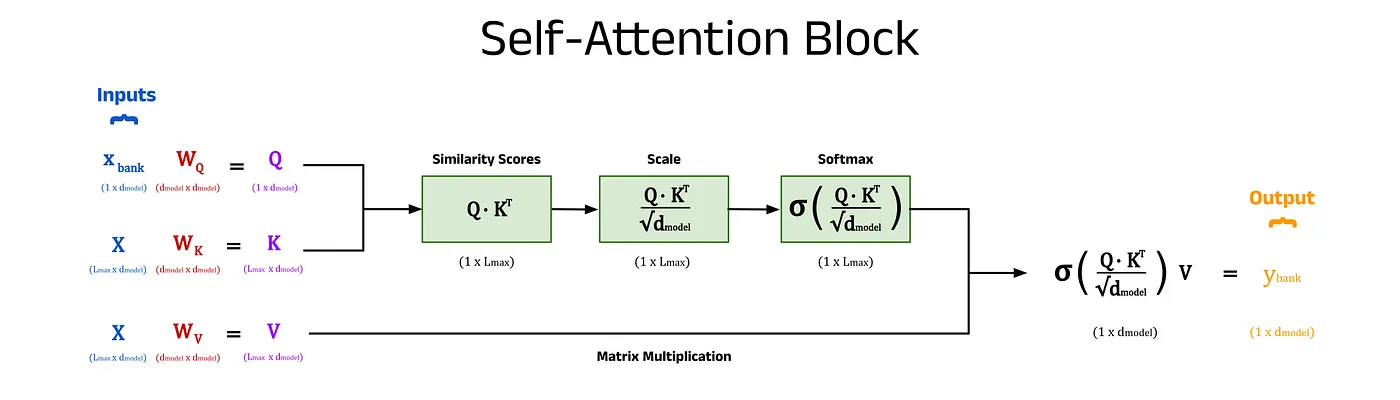

In [26]:
import torch
import torch.nn as nn

class SingleHeadAttention(nn.Module):
    """Single attention head"""

    def __init__(self, embedding_dim: int, attention_dim: int, use_mask=False):
        super().__init__()
        torch.manual_seed(0)  # Setting random seed for reproducibility
        
        # Linear layers to compute Key (K), Query (Q), and Value (V)
        self.wk = nn.Linear(embedding_dim, attention_dim, bias=False) 
        self.wq = nn.Linear(embedding_dim, attention_dim, bias=False) 
        self.wv = nn.Linear(embedding_dim, attention_dim, bias=False)
        
        # Whether to apply masking (useful for autoregressive tasks)
        self.use_mask = use_mask

    def forward(self, embedded):
        # Compute Query (Q), Key (K), and Value (V) vectors
        q = self.wq(embedded)  # Query vector [batch_size, num_words, attention_dim]
        k = self.wk(embedded)  # Key vector [batch_size, num_words, attention_dim]
        v = self.wv(embedded)  # Value vector [batch_size, num_words, attention_dim]
        
        # Compute attention scores via matrix multiplication of Q and K^T
        attn_score = torch.matmul(q, k.transpose(-2, -1)) / (k.shape[-1] ** 0.5)  # Scaled by sqrt of attention_dim
        
        # Optional masking for autoregressive tasks
        if self.use_mask:
            upper_triangular = torch.triu(torch.ones(attn_score.size()), diagonal=1).bool()
            attn_score = attn_score.masked_fill(upper_triangular, float('-inf'))  # Masking future positions
        
        # Apply softmax to attention scores to get normalized attention weights
        attn_weights = nn.functional.softmax(attn_score, dim=-1)  # [batch_size, num_words, num_words]
        
        # Weighted sum of value vectors based on attention weights
        weighted_values = torch.matmul(attn_weights, v)  # [batch_size, num_words, attention_dim]
        
        return weighted_values, attn_weights  # Final output



In [27]:
singlehead_attention = SingleHeadAttention(embedding_dim,input_ids.shape[1])

In [28]:
singlehead_attention

SingleHeadAttention(
  (wk): Linear(in_features=6, out_features=15, bias=False)
  (wq): Linear(in_features=6, out_features=15, bias=False)
  (wv): Linear(in_features=6, out_features=15, bias=False)
)

In [29]:
tokens = tokenizer.tokenize(text)
print('Token: ',tokens)

inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs['input_ids'] # Token IDs
print('\nIDs: ',input_ids)
print("Token Count: ", input_ids.shape[1])

# Get embeddings for the sentence

embedding = nn.Embedding(tokenizer.vocab_size, embedding_dim)
print(embedding)
word_embeddings = embedding(input_ids)
print("Word Embeddings Shape:", word_embeddings.shape ) 

Token:  ['self', '-', 'attention', 'calculate', '##s', 'the', 'similarity', 'between', 'words', 'using', 'the', 'dot', 'product']

IDs:  tensor([[  101,  2969,  1011,  3086, 18422,  2015,  1996, 14402,  2090,  2616,
          2478,  1996, 11089,  4031,   102]])
Token Count:  15
Embedding(30522, 6)
Word Embeddings Shape: torch.Size([1, 15, 6])


In [30]:
weighted_values, attn_weights = singlehead_attention(word_embeddings)
print(attn_weights.shape,attn_weights)

torch.Size([1, 15, 15]) tensor([[[0.0645, 0.0662, 0.0808, 0.0704, 0.0590, 0.0684, 0.0654, 0.0641,
          0.0717, 0.0642, 0.0653, 0.0654, 0.0718, 0.0622, 0.0605],
         [0.0830, 0.0788, 0.0703, 0.0756, 0.0406, 0.0495, 0.0460, 0.0593,
          0.0815, 0.0581, 0.0921, 0.0460, 0.0504, 0.0728, 0.0960],
         [0.1004, 0.0518, 0.0243, 0.0445, 0.0607, 0.0427, 0.1188, 0.0794,
          0.0366, 0.0583, 0.0786, 0.1188, 0.0172, 0.0592, 0.1087],
         [0.0766, 0.0647, 0.0480, 0.0615, 0.0705, 0.0608, 0.0766, 0.0728,
          0.0580, 0.0684, 0.0700, 0.0766, 0.0518, 0.0674, 0.0764],
         [0.0421, 0.0583, 0.1134, 0.0615, 0.0992, 0.0680, 0.0684, 0.0470,
          0.0655, 0.0496, 0.0512, 0.0684, 0.0885, 0.0666, 0.0523],
         [0.0874, 0.0705, 0.0423, 0.0631, 0.0549, 0.0565, 0.0645, 0.0759,
          0.0607, 0.0714, 0.0822, 0.0645, 0.0427, 0.0709, 0.0925],
         [0.0640, 0.0600, 0.0744, 0.0606, 0.0686, 0.0669, 0.0892, 0.0648,
          0.0587, 0.0598, 0.0644, 0.0892, 0.0493, 0.0615

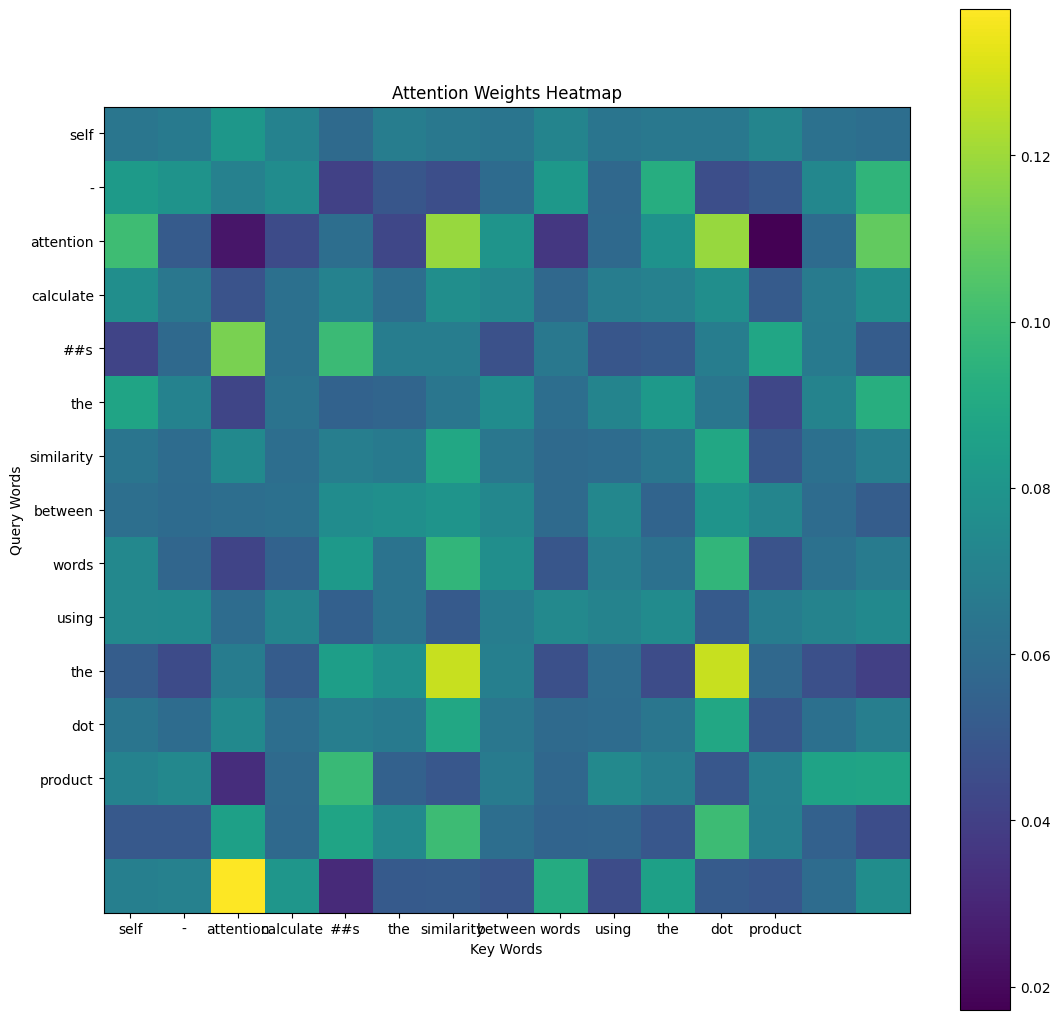

In [31]:
plt.figure(figsize=(len(tokens), len(tokens)))
plt.imshow(attn_weights.squeeze().detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Words")
plt.ylabel("Query Words")
plt.xticks(ticks=range(len(tokens)), labels=tokens)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.show()


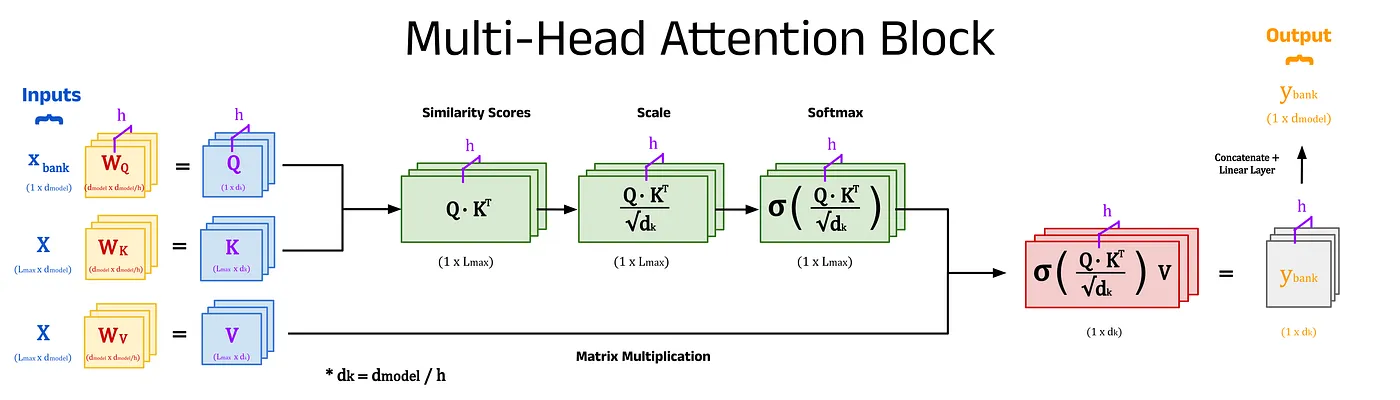

In [32]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    """Multi-Head Attention mechanism"""

    def __init__(self, embedding_dim: int, num_heads: int, attention_dim: int, use_mask=False):
        super().__init__()
        assert attention_dim % num_heads == 0, "attention_dim must be divisible by num_heads"
        
        # Attention dimension for each head
        self.head_dim = attention_dim // num_heads
        self.num_heads = num_heads
        self.use_mask = use_mask
        
        # Linear layers for Q, K, V for all heads
        self.wq = nn.Linear(embedding_dim, attention_dim, bias=False)  # Projects input to all heads at once
        self.wk = nn.Linear(embedding_dim, attention_dim, bias=False)
        self.wv = nn.Linear(embedding_dim, attention_dim, bias=False)

        # Final linear layer after concatenating all heads' output
        self.fc = nn.Linear(attention_dim, embedding_dim, bias=False)

    def split_heads(self, x, batch_size):
        """Splits the last dimension into (num_heads, head_dim) and transposes the result"""
        x = x.view(batch_size, -1, self.num_heads, self.head_dim)  # [batch_size, num_words, num_heads, head_dim]
        return x.transpose(1, 2)  # [batch_size, num_heads, num_words, head_dim]

    def forward(self, embedded):
        batch_size = embedded.size(0)
        
        # Compute Q, K, V matrices
        q = self.wq(embedded)  # [batch_size, num_words, attention_dim]
        k = self.wk(embedded)  # [batch_size, num_words, attention_dim]
        v = self.wv(embedded)  # [batch_size, num_words, attention_dim]
        
        # Split Q, K, V into multiple heads and transpose
        q = self.split_heads(q, batch_size)  # [batch_size, num_heads, num_words, head_dim]
        k = self.split_heads(k, batch_size)  # [batch_size, num_heads, num_words, head_dim]
        v = self.split_heads(v, batch_size)  # [batch_size, num_heads, num_words, head_dim]

        # Scaled Dot-Product Attention for each head
        attn_score = torch.matmul(q, k.transpose(-2, -1)) / (self.head_dim ** 0.5)  # [batch_size, num_heads, num_words, num_words]
        
        # Optional mask for autoregressive tasks
        if self.use_mask:
            upper_triangular = torch.triu(torch.ones(attn_score.size()), diagonal=1).bool()
            attn_score = attn_score.masked_fill(upper_triangular, float('-inf'))  # Masking future positions
        
        # Softmax to get attention weights
        attn_weights = nn.functional.softmax(attn_score, dim=-1)  # [batch_size, num_heads, num_words, num_words]
        
        # Weighted sum of value vectors for each head
        weighted_values = torch.matmul(attn_weights, v)  # [batch_size, num_heads, num_words, head_dim]
        
        # Concatenate heads' outputs and apply the final linear layer
        weighted_values = weighted_values.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.head_dim)

        attn_weights = attn_weights.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.head_dim)

        
        output = self.fc(weighted_values)  # [batch_size, num_words, embedding_dim]
        
        return output , attn_weights



https://arxiv.org/abs/1706.03762

https://arxiv.org/pdf/1706.03762

In [35]:
multiehead_attention = MultiHeadAttention(embedding_dim, num_heads=3, attention_dim= input_ids.shape[1])
multiehead_attention

MultiHeadAttention(
  (wq): Linear(in_features=6, out_features=15, bias=False)
  (wk): Linear(in_features=6, out_features=15, bias=False)
  (wv): Linear(in_features=6, out_features=15, bias=False)
  (fc): Linear(in_features=15, out_features=6, bias=False)
)

In [36]:
output , attn_weights  = multiehead_attention(word_embeddings)
print(attn_weights.shape,attn_weights)

torch.Size([1, 45, 15]) tensor([[[0.0668, 0.0640, 0.0574, 0.0695, 0.0662, 0.0651, 0.0529, 0.0725,
          0.0740, 0.0713, 0.0742, 0.0529, 0.0813, 0.0748, 0.0571],
         [0.0688, 0.0607, 0.0456, 0.0634, 0.0657, 0.0730, 0.0599, 0.0853,
          0.0649, 0.0821, 0.0736, 0.0599, 0.0674, 0.0730, 0.0568],
         [0.0646, 0.0710, 0.0712, 0.0675, 0.0715, 0.0648, 0.0654, 0.0600,
          0.0662, 0.0638, 0.0604, 0.0654, 0.0737, 0.0645, 0.0699],
         [0.0565, 0.0793, 0.0658, 0.0773, 0.0429, 0.0702, 0.0239, 0.0634,
          0.0939, 0.0797, 0.0746, 0.0239, 0.1129, 0.0793, 0.0564],
         [0.0763, 0.0826, 0.0895, 0.0738, 0.0501, 0.0548, 0.0683, 0.0500,
          0.0687, 0.0542, 0.0597, 0.0683, 0.0589, 0.0532, 0.0917],
         [0.0665, 0.0728, 0.0722, 0.0761, 0.0733, 0.0548, 0.0542, 0.0533,
          0.0756, 0.0582, 0.0572, 0.0542, 0.1096, 0.0625, 0.0597],
         [0.0677, 0.0630, 0.0623, 0.0794, 0.0304, 0.0659, 0.0276, 0.0816,
          0.1024, 0.0778, 0.1073, 0.0276, 0.0768, 0.0819

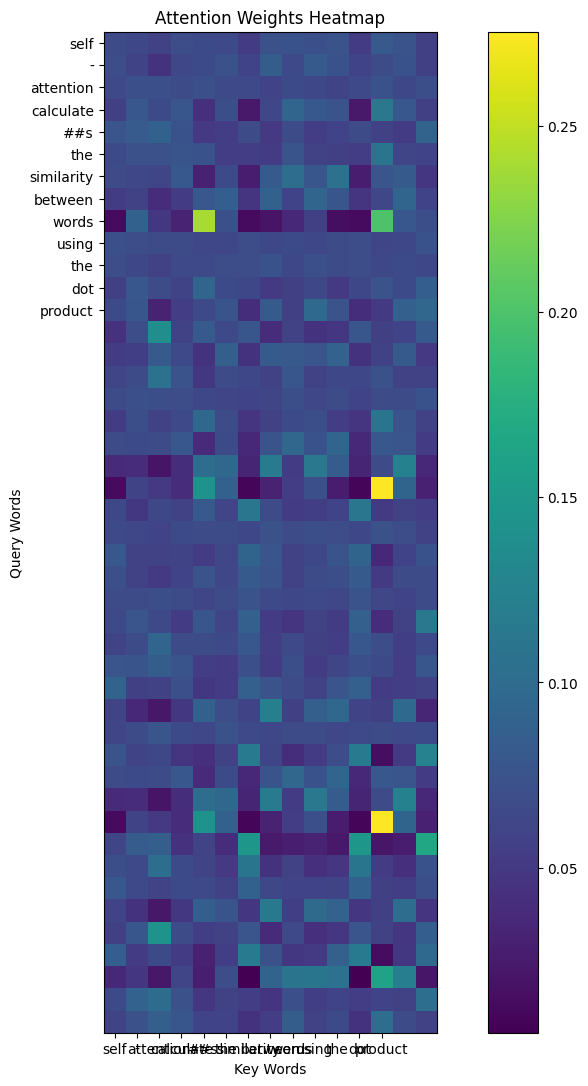

In [37]:
plt.figure(figsize=(len(tokens), len(tokens)))
plt.imshow(attn_weights.squeeze().detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Words")
plt.ylabel("Query Words")
plt.xticks(ticks=range(len(tokens)), labels=tokens)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.show()


# torch.nn.MultiheadAttention
https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html

    torch.nn.MultiheadAttention(embed_dim, num_heads, dropout=0.0, bias=True, add_bias_kv=False, add_zero_attn=False, kdim=None, vdim=None, batch_first=False, device=None, dtype=None)
    
### Parameters
   - embed_dim – Total dimension of the model.   
   - num_heads – Number of parallel attention heads. Note each head will have dimension embed_dim // num_heads).
   - dropout – Dropout probability on attn_output_weights. Default: 0.0 (no dropout).
   - bias – If specified, adds bias to input / output projection layers. Default: True.
   - add_bias_kv – If specified, adds bias to the key and value sequences at dim=0. Default: False.
   - add_zero_attn – If specified, adds a new batch of zeros to the key and value sequences at dim=1. Default: False.
   - kdim – Total number of features for keys. Default: None (uses kdim=embed_dim).
   - vdim – Total number of features for values. Default: None (uses vdim=embed_dim).
   - batch_first – If True, then the input and output tensors are provided as (batch, seq, feature). Default: False (seq, batch, feature).